In [1]:
from typing import Literal

import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# import matplotlib
# matplotlib.rcParams["mathtext.fontset"] = "stix"
# matplotlib.rcParams["font.family"] = "STIXGeneral"

In [3]:
sns.set_theme(style="darkgrid")

In [4]:
num_test: Literal[200, 500] = 500
control_or_treatment: Literal["control", "treatment"] = "treatment"

In [5]:
if control_or_treatment == "control":
    file_suffix = "control"
    treatment, control = "extra", "base"
    desc = "pretraining boost"
else:
    file_suffix = "bias"
    treatment, control = "test", "extra"
    desc = "evaluation bias"

In [6]:
idata = az.from_netcdf(filename=f"main_{num_test}_{file_suffix}.nc")

In [7]:
# takes 5 min. for num_test=200, 2 min. for num_test=500
az_summary = az.summary(idata)

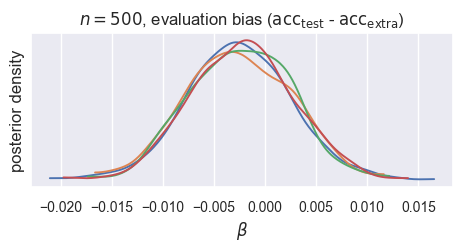

In [8]:
ax = az.plot_trace(idata, compact=False, var_names="method", filter_vars="like")
ax_posterior: plt.Axes = ax[0][0]
# csfont = {"fontname": "Times New Roman"}
# _ = ax[0][0].set_title(f'$\\beta$ for {utils.diffco_texa(treatment, control)}', **csfont)
_ = ax_posterior.set_title(
    f"$n={num_test}$, {desc} ({utils.diffco_texa(treatment, control)})"
)
_ = ax_posterior.set_xlabel(f"$\\beta$")
_ = ax_posterior.set_ylabel("posterior density")
fig = ax_posterior.get_figure()
fig.delaxes(ax[0][1])